 # **Task 1:**
# **MOVIE GENRE CLASSIFICATION**

# Create a machine learning model that can predict the genre of a movie based on its plot summary or other textual information. You can use techniques like TF-IDF or word embeddings with classifiers such as Naive Bayes, Logistic Regression, or Support Vector Machines.

* Step 1: Importing Necessary Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
columns = [ 'Movie Name' , 'Genre' , 'Description']
column = ['Movie Name' , 'Description']

* Step 2: Importing Dataset

In [ ]:
df_train = pd.read_csv('train_data.txt' , delimiter=':::' , engine='python' , names=columns , index_col=0 )
df_train.head()

,Movie Name,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
df_test_data= pd.read_csv('test_data.txt', delimiter=':::' , engine='python' , names=column , index_col=0 )
df_test_data.head()

,Movie Name,Description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...


In [ ]:
df_test= pd.read_csv('test_data_solution.txt', delimiter=':::' , engine='python' , names=columns , index_col=0 )
df_test.head()

,Movie Name,Genre,Description
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [ ]:
df_train.describe()

,Movie Name,Genre,Description
count,36946,36946,36946
unique,36946,27,36875
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,9295,10


In [ ]:
df_test.describe()

,Movie Name,Genre,Description
count,36929,36929,36929
unique,36929,27,36857
top,Edgar's Lunch (1998),drama,Grammy - music award of the American academy ...
freq,1,9370,8


In [ ]:
df_test_data.describe()

,Movie Name,Description
count,37636,37636
unique,37636,37561
top,Edgar's Lunch (1998),Grammy - music award of the American academy ...
freq,1,8


* Step 3: Data Preprocessing

In [ ]:
df_train.loc[:,'Description'] = df_train['Description'].astype(str).str.lower()
df_test.loc[:,'Description'] = df_test['Description'].astype(str).str.lower()
#df_train.loc[:,'Description']
#df_test.loc[:,'Description']

In [ ]:
df_train.drop(columns=['Movie Name'], inplace = True)
df_test.drop(columns=['Movie Name'], inplace = True)

In [ ]:
print("Training Dataset:")
df_train.head()

Training Dataset:


,Genre,Description
1,drama,listening in to a conversation between his do...
2,thriller,a brother and sister with a past incestuous r...
3,adult,as the bus empties the students for their fie...
4,drama,to help their unemployed father make ends mee...
5,drama,the film's title refers not only to the un-re...


In [ ]:
print("Testing Dataset:")
df_test.head()

Testing Dataset:


,Genre,Description
1,thriller,"l.r. brane loves his life - his car, his apar..."
2,comedy,"spain, march 1964: quico is a very naughty ch..."
3,documentary,one year in the life of albin and his family ...
4,drama,"his father has died, he hasn't spoken with hi..."
5,drama,before he was known internationally as a mart...


In [ ]:
print("Training Dataset:\n")
print(df_train.info())
print("\n Testing Dataset:\n")
print(df_test.info())

Training Dataset:

<class 'pandas.core.frame.DataFrame'>
Index: 36946 entries, 1 to 36946
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Genre        36946 non-null  object
 1   Description  36946 non-null  object
dtypes: object(2)
memory usage: 865.9+ KB
None

 Testing Dataset:

<class 'pandas.core.frame.DataFrame'>
Index: 36929 entries, 1 to 36929
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Genre        36929 non-null  object
 1   Description  36929 non-null  object
dtypes: object(2)
memory usage: 865.5+ KB
None


In [ ]:
print("Training Dataset:")
print(df_train.shape)
print("\nTesting Dataset:")
print(df_test.shape)

Training Dataset:
(36946, 2)

Testing Dataset:
(36929, 2)


In [ ]:
class_distribution = df_train['Genre'].value_counts()
print("Class Distribution:")
print(class_distribution)

Class Distribution:
Genre
 drama           9295
 documentary     8882
 comedy          5066
 short           3522
 horror          1468
 thriller        1110
 action           901
 western          692
 reality-tv       601
 family           532
 adventure        518
 music            512
 romance          445
 sci-fi           439
 adult            410
 crime            345
 animation        332
 sport            293
 talk-show        271
 mystery          226
 fantasy          215
 musical          180
 biography        168
 history          167
 game-show        137
 news             127
 war               92
Name: count, dtype: int64


* Checking Null Values:

In [ ]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

Genre          0
Description    0
dtype: int64
Genre          0
Description    0
dtype: int64


In [ ]:
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())

59
66


In [ ]:
df_train = df_train.drop_duplicates(keep ='first')
df_test = df_test.drop_duplicates(keep = 'first')

In [ ]:
print("TRAINING DUPLICATES AFTER REMOVAL:", df_train.duplicated().sum())
print("TEST DUPLICATES AFTER REMOVAL:", df_test.duplicated().sum())

TRAINING DUPLICATES AFTER REMOVAL: 0
TEST DUPLICATES AFTER REMOVAL: 0


In [ ]:
print(df_train.shape)
print(df_test.shape)

(36887, 2)
(36863, 2)


In [ ]:
# SEPARATE FEATURES AND LABELS FOR TRAINING AND TEST DATASETS
x_train_full = df_train['Description']
y_train_full = df_train['Genre']


In [ ]:
x_test = df_test['Description']
y_test = df_test['Genre']

In [ ]:
print(x_train_full.shape)
print(y_train_full.shape)
print(x_test.shape)
print(y_test.shape)

(36887,)
(36887,)
(36863,)
(36863,)


* Visualization

* Plot of the Distribution of genres in the training dataset:

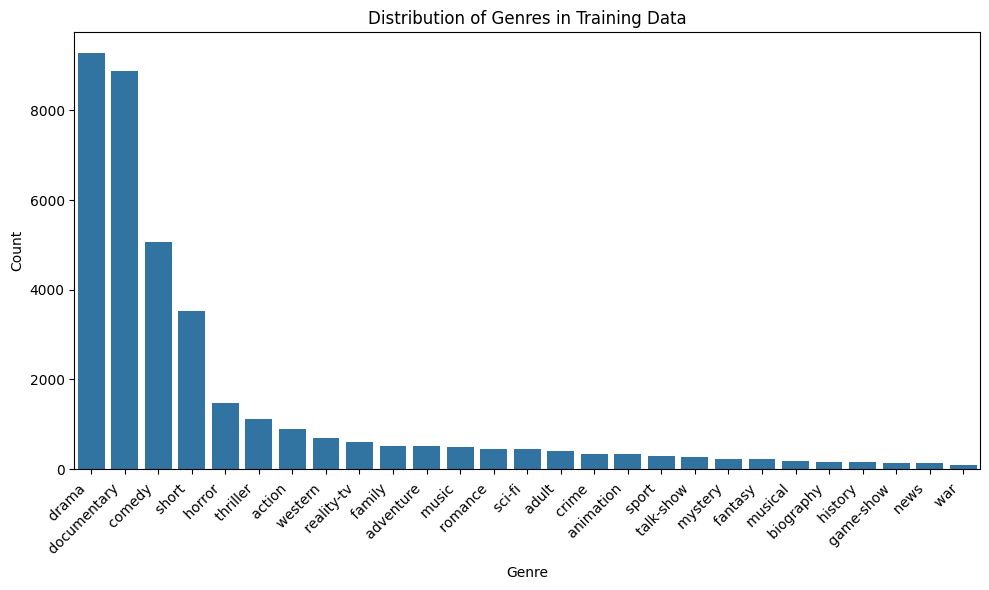

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each genre, use 'Genre' instead of 'genre'
genre_counts = df_train['Genre'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Genres in Training Data')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

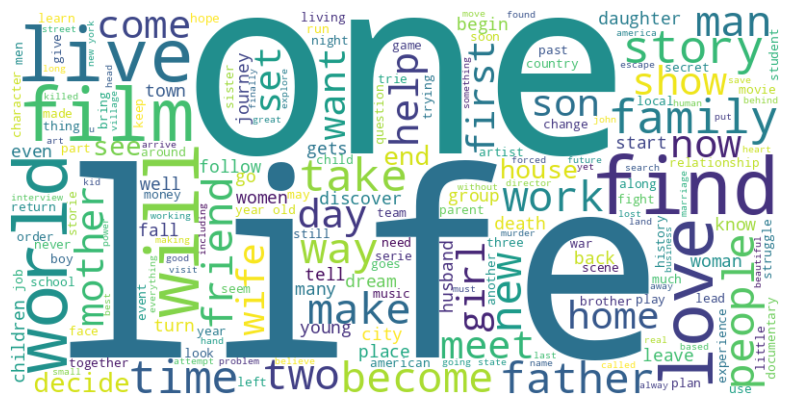

In [ ]:
from wordcloud import WordCloud
def word_cloud(data):
    # Use 'Description' instead of 'description'
    all_desc=' '.join(data['Description'])
    wordcloud=WordCloud(height=400,width=800,background_color='white').generate(all_desc)
    plt.figure(figsize=(10,5))

    plt.axis('off')
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.show()
word_cloud(df_train)

In [ ]:
def barplot(data):
    # Count the occurrences of each genre
    genre_counts = test_data['genre'].value_counts()

    # Create a bar plot
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    sns.barplot(x=genre_counts.index, y=genre_counts.values)
    plt.xlabel
    plt.show()

* Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_val , Y_train , Y_val = train_test_split(x_train_full , y_train_full , test_size=0.2 , random_state=42)

In [ ]:
print("Shapes of the splitting datasets:")
print(X_train.shape)
print(X_val.shape)
print(x_test.shape)
print('\n')
print(Y_train.shape)
print(Y_val.shape)
print(y_test.shape)

Shapes of the splitting datasets:
(29509,)
(7378,)
(36863,)


(29509,)
(7378,)
(36863,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words ='english' , max_features=5000)

X_train_vec = tfidf.fit_transform(X_train)
X_val_vec = tfidf.transform(X_val)
X_test_vec = tfidf.transform(x_test)
#X_val_vec.shape

In [ ]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec , Y_train)

MultinomialNB()

In [ ]:
y_pred_nb = nb_classifier.predict(X_val_vec)
from sklearn.metrics import accuracy_score, classification_report
accuracy_val = accuracy_score(Y_val, y_pred_nb)
print("Validation Accuracy:", accuracy_val)
print("Validation Classification Report:")
print(classification_report(Y_val, y_pred_nb, zero_division=0))

Validation Accuracy: 0.5052859853618867
Validation Classification Report:
               precision    recall  f1-score   support

      action        0.62      0.05      0.09       162
       adult        0.00      0.00      0.00        84
   adventure        0.86      0.06      0.11       101
   animation        0.00      0.00      0.00        66
   biography        0.00      0.00      0.00        23
      comedy        0.52      0.39      0.45      1040
       crime        0.00      0.00      0.00        59
 documentary        0.56      0.89      0.69      1756
       drama        0.44      0.82      0.58      1872
      family        0.00      0.00      0.00       122
     fantasy        0.00      0.00      0.00        51
   game-show        1.00      0.16      0.28        31
     history        0.00      0.00      0.00        39
      horror        0.75      0.27      0.39       301
       music        1.00      0.06      0.11       102
     musical        0.00      0.00      0.00 

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_classifier=LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train_vec,Y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred_lr = lr_classifier.predict(X_val_vec)
accuracy_val = accuracy_score(Y_val, y_pred_lr)
print("Validation Accuracy:", accuracy_val)
print("Validation Classification Report:")
print(classification_report(Y_val, y_pred_lr, zero_division=0))

Validation Accuracy: 0.5670913526701002
Validation Classification Report:
               precision    recall  f1-score   support

      action        0.41      0.20      0.27       162
       adult        0.74      0.17      0.27        84
   adventure        0.54      0.13      0.21       101
   animation        0.60      0.05      0.08        66
   biography        0.00      0.00      0.00        23
      comedy        0.52      0.56      0.54      1040
       crime        0.00      0.00      0.00        59
 documentary        0.65      0.87      0.74      1756
       drama        0.52      0.77      0.62      1872
      family        0.44      0.06      0.10       122
     fantasy        0.00      0.00      0.00        51
   game-show        0.93      0.42      0.58        31
     history        0.00      0.00      0.00        39
      horror        0.64      0.50      0.56       301
       music        0.71      0.45      0.55       102
     musical        0.00      0.00      0.00 

In [ ]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_vec , Y_train)

In [ ]:
# Assuming 'vectorizer' is the object used to transform training data
X_val_vec = vectorizer.transform(X_val)  # Apply the same transformation to validation data

y_pred_svm = svm_classifier.predict(X_val_vec)
print("Support Vector Machines Accuracy:", accuracy_score(Y_val , y_pred_svm))
print(classification_report(Y_val , y_pred_svm))

Support Vector Machines Accuracy: 0.5475738682569802


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.40      0.05      0.09       162
       adult        1.00      0.11      0.19        84
   adventure        0.86      0.12      0.21       101
   animation        0.00      0.00      0.00        66
   biography        0.00      0.00      0.00        23
      comedy        0.51      0.50      0.51      1040
       crime        0.00      0.00      0.00        59
 documentary        0.60      0.90      0.72      1756
       drama        0.48      0.81      0.61      1872
      family        0.00      0.00      0.00       122
     fantasy        0.00      0.00      0.00        51
   game-show        0.92      0.39      0.55        31
     history        0.00      0.00      0.00        39
      horror        0.76      0.45      0.56       301
       music        0.89      0.24      0.37       102
     musical        0.00      0.00      0.00        36
     mystery        0.00      0.00      0.00        53
        n

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Conclusion:**
# The project demonstrated the efficacy of using textual information to predict movie genres. The combination of TF-IDF for feature extraction and [best-performing model] for classification proved to be a powerful approach. The High Accuracy for genres like documentary and drams, and less accuracy genres like biography and fantasy.